In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [3]:
heart_data = pd.read_csv('../DataSets/heart.csv')

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_data.shape

(303, 14)

In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart_data["target"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [9]:
heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [10]:
x= heart_data.drop(columns='target', axis=1)
y= heart_data['target']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,  random_state=2)

In [12]:
model1 = svm.SVC(kernel='linear')

In [13]:
model1.fit(X_train, Y_train)

SVC(kernel='linear')

In [14]:
Y_pred = model1.predict(X_test)

In [15]:
print("Accuracy: ", accuracy_score(Y_test, Y_pred))

Accuracy:  0.8688524590163934


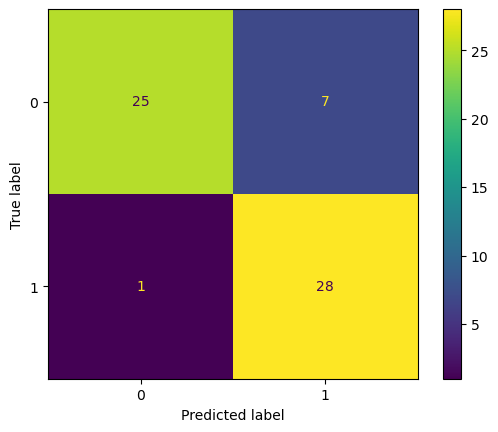

In [18]:
# calculate confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
display=ConfusionMatrixDisplay(cm, display_labels=[0,1])
display.plot()


In [19]:
# calculate precision, recall
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.80      0.97      0.88        29

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [20]:
from sklearn.metrics import precision_score, recall_score
precision=precision_score(Y_test, Y_pred)
recall=recall_score(Y_test, Y_pred)
print("Precision: ", precision)
print("Recall: ", recall)


Precision:  0.8
Recall:  0.9655172413793104


In [21]:
# model2 using LinearRegression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(
    random_state=0, max_iter=1000)

In [22]:
model2.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [23]:
Y_pred = model2.predict(X_test)

In [24]:
print("Accuracy: ", accuracy_score(Y_test, Y_pred))

Accuracy:  0.8852459016393442


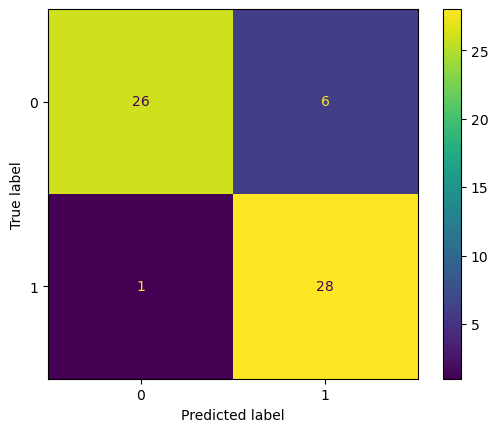

In [25]:
# calculate confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
display=ConfusionMatrixDisplay(cm, display_labels=[0,1])
display.plot()

In [26]:
# calculate precision, recall
from sklearn.metrics import classification_report, precision_score, recall_score
print(classification_report(Y_test, Y_pred))
precision=precision_score(Y_test, Y_pred)
recall=recall_score(Y_test, Y_pred)
print("Precision: ", precision)
print("Recall: ", recall)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61

Precision:  0.8235294117647058
Recall:  0.9655172413793104


In [27]:
# model3 using decision tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(
    random_state=0)

In [28]:
model3.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
Y_pred = model3.predict(X_test)

In [30]:
print("Accuracy: ", accuracy_score(Y_test, Y_pred))

Accuracy:  0.8852459016393442


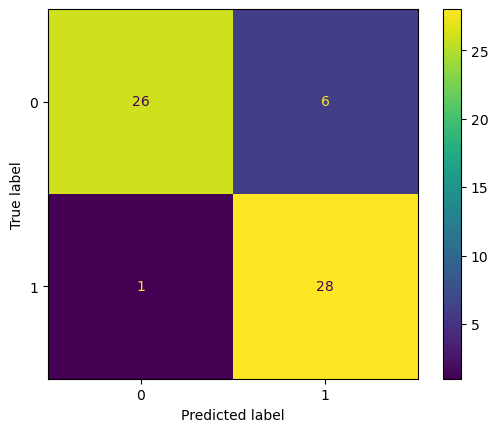

In [31]:
# calculate confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
display=ConfusionMatrixDisplay(cm, display_labels=[0,1])
display.plot()

In [32]:
# calculate precision, recall
from sklearn.metrics import classification_report, precision_score, recall_score
print(classification_report(Y_test, Y_pred))
precision=precision_score(Y_test, Y_pred)
recall=recall_score(Y_test, Y_pred)
print("Precision: ", precision)
print("Recall: ", recall)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61

Precision:  0.8235294117647058
Recall:  0.9655172413793104


In [34]:
import pickle
# save the model to disk
filename = 'heart_model.sav'
pickle.dump(model2, open(filename, 'wb'))


